In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (76/76), 318.16 KiB | 2.09 MiB/s, done.
Resolving deltas: 100% (26/26), done.
./
./root/
./root/.bashrc.biolab
./root/.condarc
./root/.vimrc
./root/.tmux.conf
./root/.bin.priority/
./root/.bin.priority/pip2
./root/.bin.priority/pip
./root/.bin.priority/pip3
./root/.profile
--2025-05-29 09:55:48--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155472915 (148M) [application/octet-stream]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>] 1

In [ ]:
!conda install -y bedtools bioawk samtools

Channels:
 - conda-forge
 - bioconda
 - defaults
Platform: linux-64
Solving environment: \ | / - \ | done


==> WARNING: A newer version of conda exists. <==
    current version: 25.3.1
    latest version: 25.5.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/conda

  added / updated specs:
    - bedtools
    - bioawk
    - samtools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bedtools-2.31.1            |       h13024bc_3         1.5 MB  bioconda
    bioawk-1.0                 |      h577a1d6_13         198 KB  bioconda
    c-ares-1.34.5              |       hb9d3cd8_0         202 KB  conda-forge
    ca-certificates-2025.4.26  |       hbd8a1cb_0         149 KB  conda-forge
    conda-25.5.0               |  py313h78bf25f_0         1.1 MB  conda-forge
    expat-2.7.0                |       

In [ ]:
%cd /content/drive/MyDrive/binfo1-work/

/content/drive/MyDrive/binfo1-work


In [ ]:
!grep -i mirlet7g ../binfo1-datapack1/gencode.gtf

chr9	ENSEMBL	gene	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; gene_type "miRNA"; gene_name "Mirlet7g"; level 3; mgi_id "MGI:2676800";
chr9	ENSEMBL	transcript	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";
chr9	ENSEMBL	exon	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; exon_number 1; exon_id "ENSMUSE00000522665.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";


In [ ]:
import requests

def get_kegg_pathways(LIN28A):
    # Search for the gene symbol in KEGG
    url = f"http://rest.kegg.jp/find/genes/{LIN28A}"
    response = requests.get(url)

    if response.status_code == 200:
        entries = response.text.strip().split('\n')
        for entry in entries:
            gene_id = entry.split('\t')[0]
            pathways_url = f"http://rest.kegg.jp/link/pathway/{gene_id}"
            pathways_response = requests.get(pathways_url)

            if pathways_response.status_code == 200:
                result = pathways_response.text.strip()
                if result:
                    print(f"\nPathways for {gene_id}:")
                    for line in result.split('\n'):
                        print("  ", line)
                else:
                    print(f"\nNo pathways found for {gene_id}")
            else:
                print(f"\nFailed to retrieve pathways for {gene_id}")
    else:
        print(f"Gene {LIN28A} not found in KEGG.")

get_kegg_pathways("LIN28A")



No pathways found for hsa:79727

No pathways found for ptr:456661

No pathways found for pps:100973467

No pathways found for ggo:101126797

No pathways found for pon:100452278

No pathways found for ppyg:129042792

No pathways found for nle:100603458

No pathways found for hmh:116813122

No pathways found for ssyn:129471984

No pathways found for mcc:719865


KeyboardInterrupt: 

In [ ]:
pip install requests pandas


In [ ]:
import requests
import pandas as pd

def get_string_interactions(gene_name, species=9606, required_score=700, limit=20):
    """
    Fetch interaction partners from STRING database using STRING API.
    - gene_name: name of the gene (e.g., 'LIN28A')
    - species: NCBI taxonomy ID (9606 = human)
    - required_score: minimum confidence score (0–1000)
    - limit: max number of interactions returned
    """

    url = "https://string-db.org/api/tsv/network"

    params = {
        "identifiers": gene_name,
        "species": species,
        "required_score": required_score,
        "limit": limit,
        "caller_identity": "chatgpt_string_example"
    }

    response = requests.get(url, params=params)

    if response.status_code == 200:
        lines = response.text.strip().split("\n")
        data = [line.split("\t") for line in lines[1:]]  # Skip header
        df = pd.DataFrame(data, columns=lines[0].split("\t"))
        return df
    else:
        print("Failed to fetch STRING data.")
        return None

df = get_string_interactions("LIN28A", required_score=700, limit=50)

if df is not None:
    print(df[["preferredName_A", "preferredName_B", "score"]])


    preferredName_A preferredName_B  score
0             SALL4         ZSCAN10  0.869
1             SALL4           STAT3   0.88
2             SALL4          LIN28A  0.905
3             SALL4          PRDM14  0.908
4             SALL4            SOX2  0.983
..              ...             ...    ...
124           GAPDH             MYC   0.85
125           KHSRP          DICER1  0.979
126           KHSRP          DROSHA  0.985
127          DROSHA          DICER1  0.992
128           HMGA2             MYC  0.756

[129 rows x 3 columns]


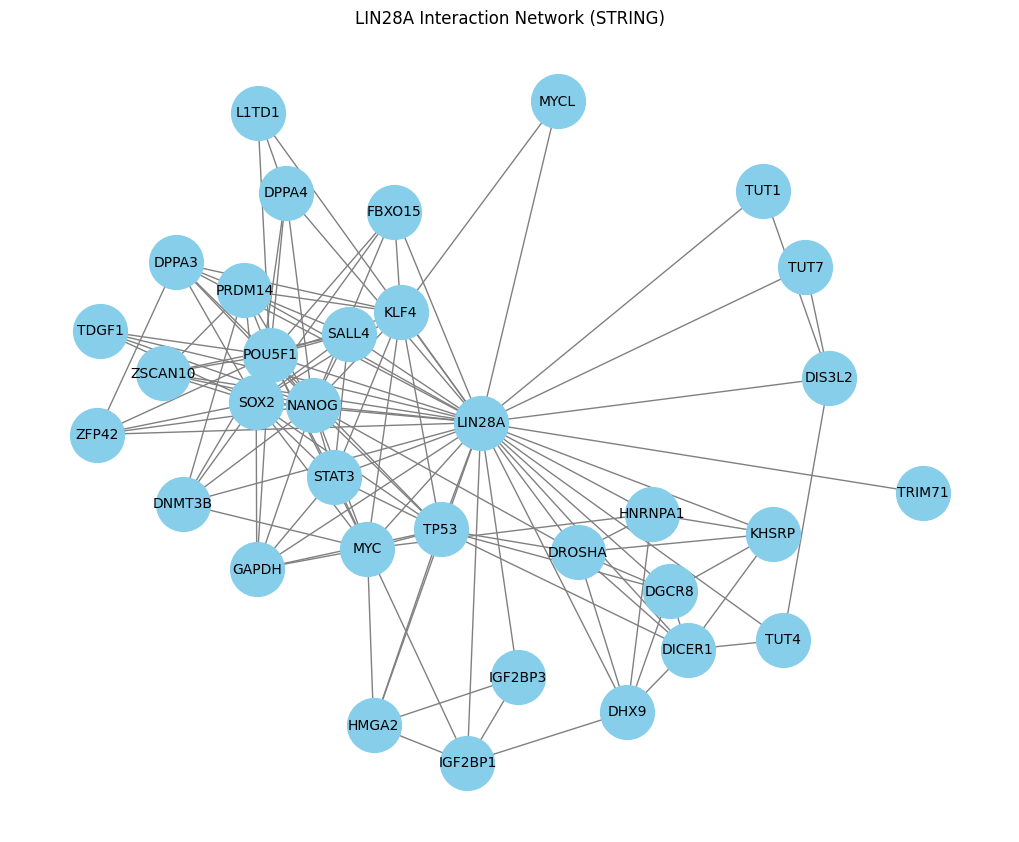

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row["preferredName_A"], row["preferredName_B"], weight=float(row["score"]))

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=1500, font_size=10)
plt.title("LIN28A Interaction Network (STRING)")
plt.show()


In [ ]:
import requests

def get_kegg_pathways_for_gene(gene_symbol, species="mmu"):
    """Return KEGG pathways for a single gene (e.g., LIN28A)"""
    find_url = f"http://rest.kegg.jp/find/genes/{species}:{gene_symbol}"
    find_response = requests.get(find_url)

    if find_response.status_code == 200 and find_response.text:
        gene_id = find_response.text.split("\t")[0]  # e.g., hsa:84621
        link_url = f"http://rest.kegg.jp/link/pathway/{gene_id}"
        link_response = requests.get(link_url)
        if link_response.status_code == 200:
            return [line.split("\t")[1] for line in link_response.text.strip().split("\n")]
    return []

kegg_map = {}
interactors = set(df["preferredName_A"]).union(set(df["preferredName_B"]))

for gene in interactors:
    kegg_pathways = get_kegg_pathways_for_gene(gene)
    kegg_map[gene] = kegg_pathways

for gene, pathways in kegg_map.items():
    print(f"{gene}: {pathways}")


TUT1: []
MYC: []
ZSCAN10: []
SALL4: []
IGF2BP3: []
DPPA4: []
DIS3L2: []
IGF2BP1: []
FBXO15: []
L1TD1: []
DHX9: []
DICER1: []
DROSHA: []
TDGF1: []
NANOG: []
GAPDH: []
HMGA2: []
TRIM71: []
POU5F1: []
SOX2: []
TUT7: []
PRDM14: []
DNMT3B: []
KLF4: []
LIN28A: []
DGCR8: []
DPPA3: []
KHSRP: []
MYCL: []
TUT4: []
STAT3: []
ZFP42: []
HNRNPA1: []
TP53: []


In [ ]:
import GEOparse

gse = GEOparse.get_GEO("GSE37114")

print("Sample IDs:", list(gse.gsms.keys())[:5])

sample = gse.gsms["GSM910950"]
print("Platform:", sample.metadata["platform_id"])
print(sample.table.head())


29-May-2025 10:14:28 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
29-May-2025 10:14:28 INFO GEOparse - File already exist: using local version.
INFO:GEOparse:File already exist: using local version.
29-May-2025 10:14:28 INFO GEOparse - Parsing ./GSE37114_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE37114_family.soft.gz: 
29-May-2025 10:14:28 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
29-May-2025 10:14:28 DEBUG GEOparse - SERIES: GSE37114
DEBUG:GEOparse:SERIES: GSE37114
29-May-2025 10:14:28 DEBUG GEOparse - PLATFORM: GPL6246
DEBUG:GEOparse:PLATFORM: GPL6246
29-May-2025 10:14:33 DEBUG GEOparse - PLATFORM: GPL8824
DEBUG:GEOparse:PLATFORM: GPL8824
29-May-2025 10:14:33 DEBUG GEOparse - PLATFORM: GPL9250
DEBUG:GEOparse:PLATFORM: GPL9250
29-May-2025 10:14:33 DEBUG GEOparse - PLATFORM: GPL11002
DEBUG:GEOparse:PLATFORM: GPL11002
29-May-2025 10:14:33 DEBUG GEOparse - SAMPLE: GSM910950
DEBUG:GEOparse:SAMPLE: G

Sample IDs: ['GSM910950', 'GSM910951', 'GSM910952', 'GSM910953', 'GSM910954']
Platform: ['GPL9250']
Empty DataFrame
Columns: []
Index: []


In [ ]:
!pip install GEOparse bioservices

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.3/145.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.2/750.2 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 6.7 MB/s eta 0:00:00


In [ ]:
import GEOparse
gse = GEOparse.get_GEO("GSE37114",destdir=".")
print("Sample IDs:", list(gse.gsms.keys())[:5])

29-May-2025 10:17:19 DEBUG utils - Directory . already exists. Skipping.
DEBUG:GEOparse:Directory . already exists. Skipping.
29-May-2025 10:17:19 INFO GEOparse - File already exist: using local version.
INFO:GEOparse:File already exist: using local version.
29-May-2025 10:17:19 INFO GEOparse - Parsing ./GSE37114_family.soft.gz: 
INFO:GEOparse:Parsing ./GSE37114_family.soft.gz: 
29-May-2025 10:17:19 DEBUG GEOparse - DATABASE: GeoMiame
DEBUG:GEOparse:DATABASE: GeoMiame
29-May-2025 10:17:19 DEBUG GEOparse - SERIES: GSE37114
DEBUG:GEOparse:SERIES: GSE37114
29-May-2025 10:17:19 DEBUG GEOparse - PLATFORM: GPL6246
DEBUG:GEOparse:PLATFORM: GPL6246
29-May-2025 10:17:26 DEBUG GEOparse - PLATFORM: GPL8824
DEBUG:GEOparse:PLATFORM: GPL8824
29-May-2025 10:17:26 DEBUG GEOparse - PLATFORM: GPL9250
DEBUG:GEOparse:PLATFORM: GPL9250
29-May-2025 10:17:26 DEBUG GEOparse - PLATFORM: GPL11002
DEBUG:GEOparse:PLATFORM: GPL11002
29-May-2025 10:17:26 DEBUG GEOparse - SAMPLE: GSM910950
DEBUG:GEOparse:SAMPLE: GSM

Sample IDs: ['GSM910950', 'GSM910951', 'GSM910952', 'GSM910953', 'GSM910954']


In [ ]:
print(gse.gpls.keys())

dict_keys(['GPL6246', 'GPL8824', 'GPL9250', 'GPL11002'])


In [ ]:
platform_id = list(gse.gpls.keys())[0]
platform = gse.gpls[platform_id]

print("Platform:",platform_id)
print("Metadata:\n",platform.metadata)

print("Table columns:",platform.table.columns)
print(platform.table.head())

Platform: GPL6246
Metadata:
 {'title': ['[MoGene-1_0-st] Affymetrix Mouse Gene 1.0 ST Array [transcript (gene) version]'], 'geo_accession': ['GPL6246'], 'status': ['Public on Dec 05 2007'], 'submission_date': ['Dec 05 2007'], 'last_update_date': ['Mar 04 2019'], 'technology': ['in situ oligonucleotide'], 'distribution': ['commercial'], 'organism': ['Mus musculus'], 'taxid': ['10090'], 'manufacturer': ['Affymetrix'], 'manufacture_protocol': ["See manufacturer's web site", ''], 'description': ['Affymetrix submissions are typically submitted to GEO using the GEOarchive method described at http://www.ncbi.nlm.nih.gov/projects/geo/info/geo_affy.html', '', 'June 03, 2009: annotation table updated with netaffx build 28', 'June 07, 2012: annotation table updated with netaffx build 32', 'July 01, 2016: annotation table updated with netaffx build 35'], 'web_link': ['http://www.affymetrix.com/support/technical/byproduct.affx?product=mogene-1_0-st-v1', 'http://www.affymetrix.com/support/technical/

In [ ]:
import urllib.request

gpl_id = "GPL6246"
gpl_url = f"ftp://ftp.ncbi.nlm.nih.gov/geo/platforms/GPL62nnn/{gpl_id}/soft/{gpl_id}.soft.gz"
gpl_file = f"{gpl_id}.soft.gz"

try:
    urllib.request.urlretrieve(gpl_url, gpl_file)
    print(f"{gpl_file} downloaded.")
except Exception as e:
    print("Automatic download failed. Use this link to manually download:")
    print(f"https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc={gpl_id}")

Automatic download failed. Use this link to manually download:
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GPL6246


In [ ]:
import GEOparse

platform = GEOparse.get_GEO(filepath="GPL6246.soft")
print(platform.table.head())

29-May-2025 10:22:17 INFO GEOparse - Parsing GPL6246.soft: 
INFO:GEOparse:Parsing GPL6246.soft: 


FileNotFoundError: [Errno 2] No such file or directory: 'GPL6246.soft'